<a href="https://colab.research.google.com/github/saks0106/Time-Series/blob/main/Time_Series_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Relevant Packages

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [12]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [13]:
df_comp['market_value']=df_comp.spx

In [14]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise
No Pattern and unpredictable.

It has 0 mean, constant std, no autocorrelation ie current time has no impact of previous time



In [15]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
# adding noise, all values close to mean

In [16]:
df['wn'] = wn

<ipython-input-16-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [17]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1080.935061
std,292.559287,290.891360
min,438.920000,17.228956
25%,914.620000,878.031586
50%,1144.650000,1079.531063
75%,1316.280729,1283.167419
max,1570.252238,2081.586288


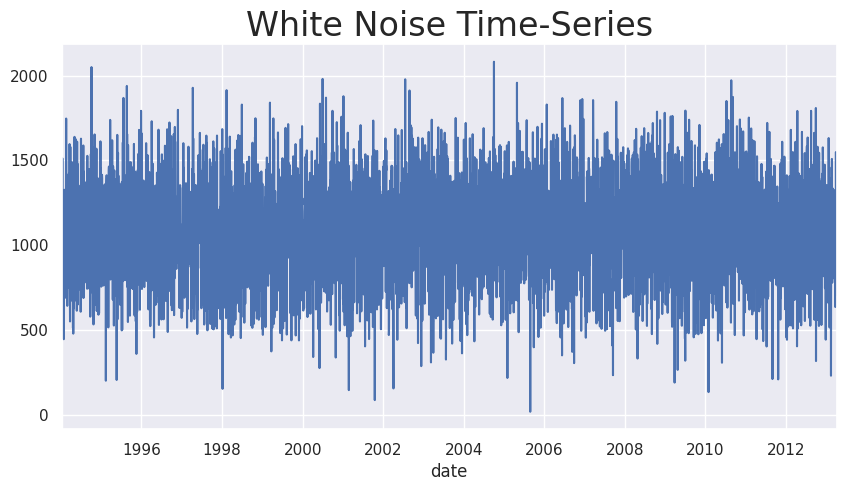

In [32]:
df.wn.plot(figsize = (10,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

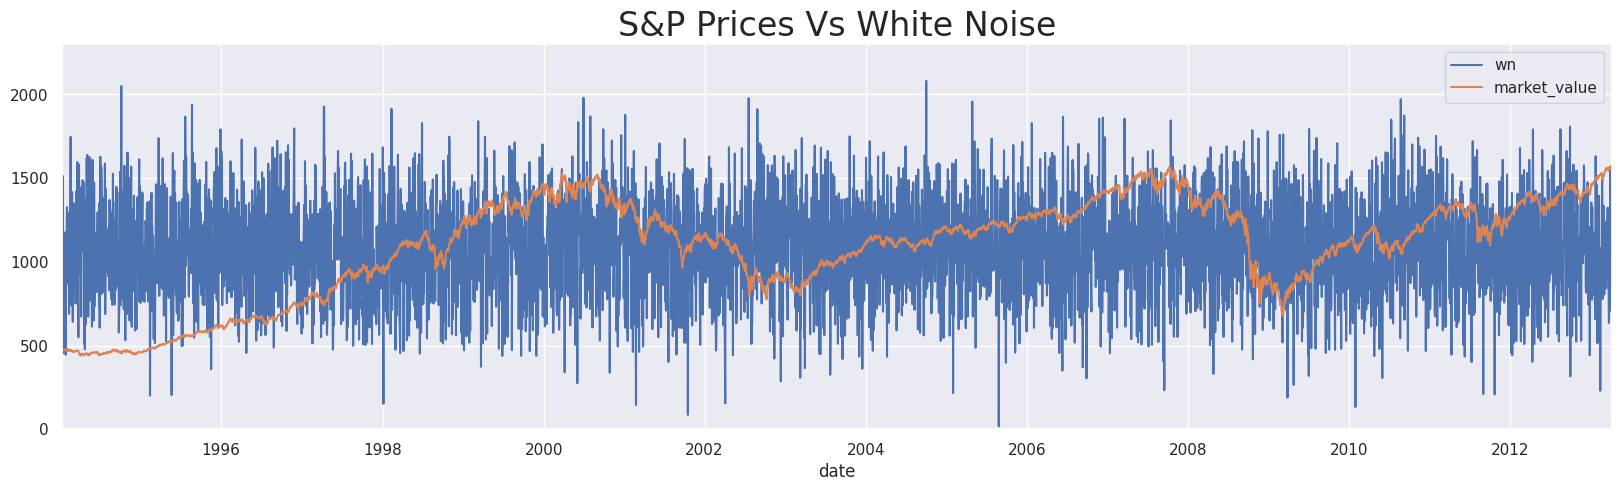

In [35]:
df.wn.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices Vs White Noise", size = 24)
plt.legend()
plt.ylim(0,2300)
plt.show()

### Random Walk

A time series where differences between 2 points is white noise.

Price(t) = Price(t-1) + Residual (White Noise)

In Summary: Best Prices for Yesterday and Tomorrow is Today's Prices

Random Walk will not allow to Predict prices Accurately

White Noise and Random Walks look and feel very different though both are errors. Random Walk are Non- Stationary

In [20]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [21]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [22]:
df['rw'] = rw.price #price in old df

<ipython-input-22-ef067d009833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [23]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1273.728348,1122.139662
1994-01-10,475.27,908.444570,1080.347860
1994-01-11,474.13,896.534791,1082.095245
1994-01-12,474.17,886.448457,1083.639265
1994-01-13,472.47,1512.215729,1067.146255


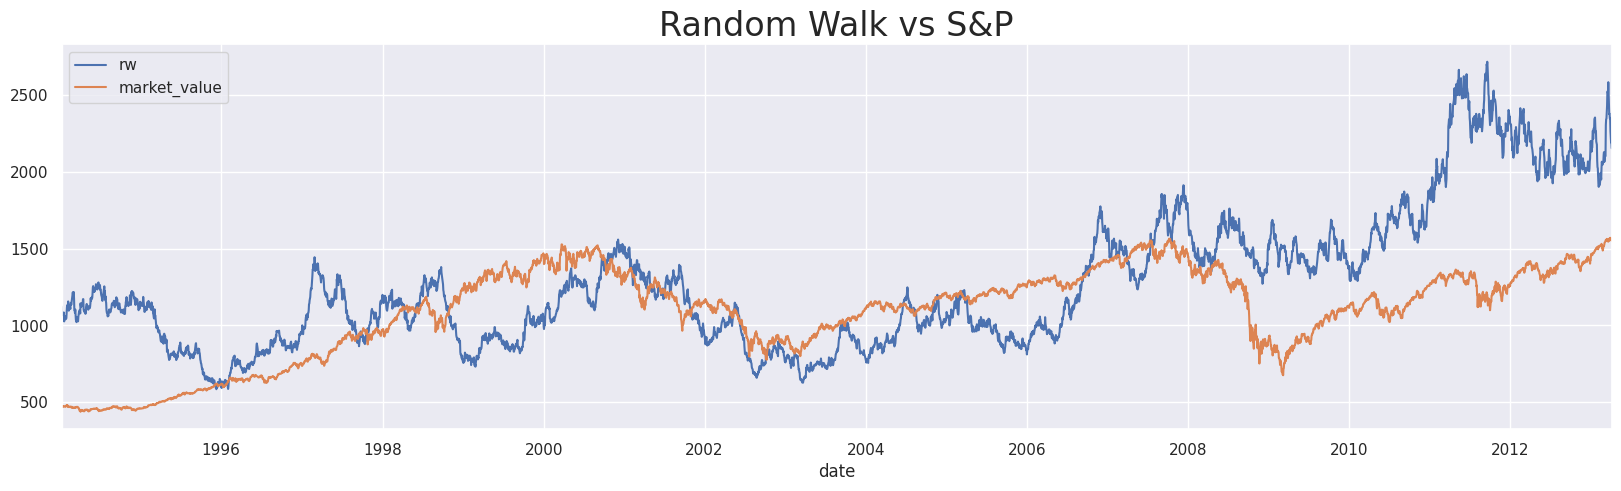

In [36]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend()
plt.show()

### Stationarity

Days = [1,2,3,4,5,6,7,8,9]

Sample1 = [1,2,3,4,5]

Sample2 = [3,4,5,6,7]

Covariance of Sample1 and Sample2 should be no matter the starting point. This is called Stationarity or Covariance Stationarity. Constant mean, std and CoV should be same for 2 samples. Also it contains White Noise

Dickey-Fuller Test is used to find is series is Stationary or Not

H0: Non-Stationary
H1: Stationary

If Test Statistics < Critical value, we reject H0



In [25]:
sts.adfuller(df.market_value) #Non-Stationary

#-1.7369847452352456 is Test Statistics
# '1%', '5%','10%' are critical values
# 0.4121645696770613 ~ 41% chance of not rejecting the H0
# 18 is 18 lags(Autocorrelation)
#5002 is number of Observations
#39904.880607487445 - lower the value, easier to make preditions
#  Test Statistics > critical values,
  #we fail to reject H0, and conclude
  #Series is Non-Stationary

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [37]:
sts.adfuller(df.wn)  #White Noise-Stationary

#-71 << -3,-2,-2
#As this is White noise, No Autocorrelation, No Lags
#We reject H0, and conclude its stationary

(-71.69755728407694,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70755.18717253227)

In [27]:
sts.adfuller(df.rw) # Random Walks-Non-Stationary

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

Trend: Pattern

Seasonal: Cyclcical Effects

Residual: Error of Prediction

###Naive Decomposition - Additive and Multiplicative

Additive = Trend+Seasonal+Residual

Multiplicative = Trend * Seasonal * Residual

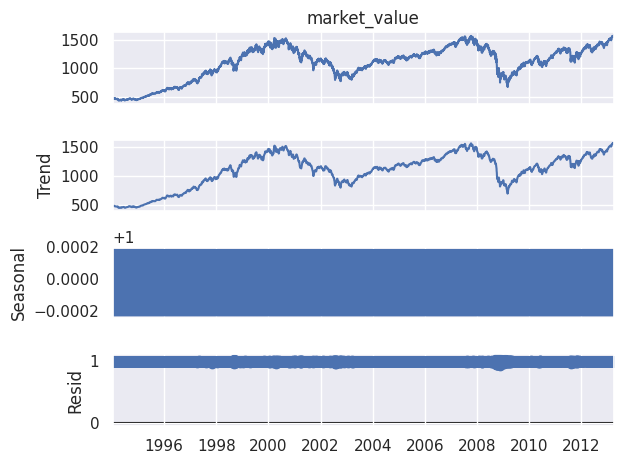

In [28]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Correlation measures similarity in the changes of values of 2 series

### ACF

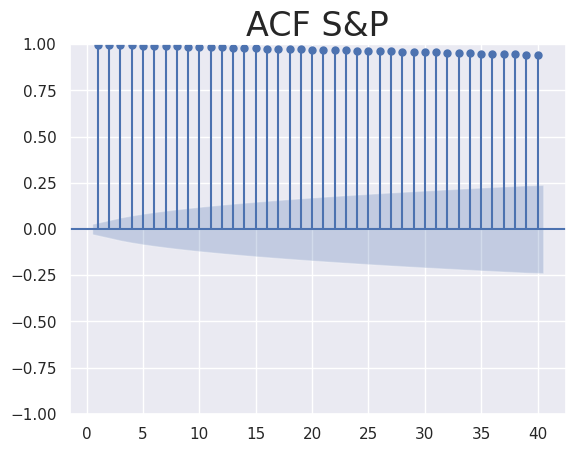

In [29]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
  #lags is how much prev points into consideration
  #correlation with itself is going to be 1, so zero is False
plt.title("ACF S&P", size = 24)
plt.show()

#x axis represent lags, y axis is autocorr coeff(-1 to +1)
#line represent time series and lagged copy of itself
  #1st line represent autocorr 1 time period ago
  #2nd line represent autocorr 2 time period ago

#blue area represnts significances, as lag values increase
  #significance also increase
  #more significance less autocorr, eg at 40 autocorr will be close to 39 rather than 1



### PACF

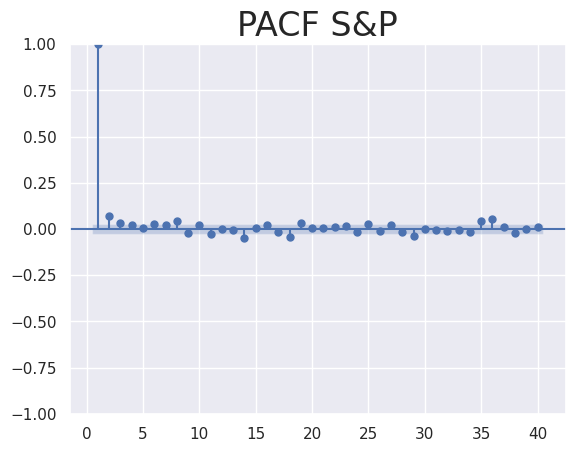

In [30]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

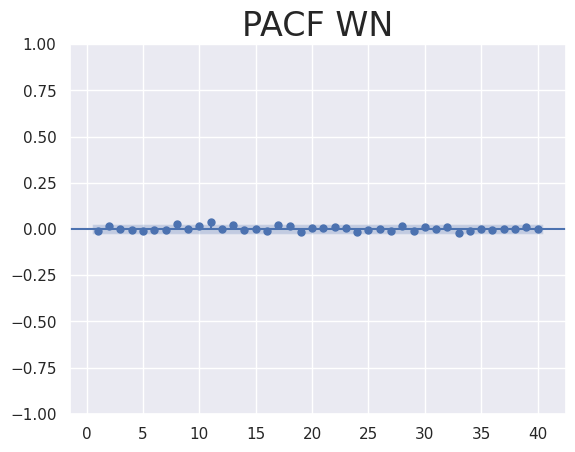

In [31]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()